In [1]:
import pandas as pd

full_train = pd.read_csv('/mnt/ml-team/minerva/toxic/data/train.csv')
train = pd.read_csv('/mnt/ml-team/minerva/toxic/data/train_split.csv')
valid = pd.read_csv('/mnt/ml-team/minerva/toxic/data/valid_split.csv')
test = pd.read_csv('/mnt/ml-team/minerva/toxic/data/test.csv')

In [2]:
train.shape, valid.shape, test.shape

((76680, 8), (19171, 8), (226998, 2))

In [3]:
train.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,862934109910,Ontario maps \n\nI notice you're the creator o...,0,0,0,0,0,0
1,983238003236,"""==Speedy deletion==\n\nHey, I just finished w...",0,0,0,0,0,0


In [30]:
train['chars'] = train['comment_text'].astype(str).apply(len)
test['chars'] = test['comment_text'].astype(str).apply(len)

In [31]:
train['chars'].describe()

count    76680.000000
mean       396.171022
std        599.407479
min          6.000000
25%         96.000000
50%        205.000000
75%        434.000000
max       5000.000000
Name: chars, dtype: float64

In [32]:
test['chars'].describe()

count    2.269980e+05
mean     4.737803e+02
std      4.445600e+03
min      1.000000e+00
25%      6.800000e+01
50%      2.180000e+02
75%      5.290000e+02
max      2.003165e+06
Name: chars, dtype: float64

In [33]:
train_comments = list(train['comment_text'].values)
train_comments = ' '.join(train_comments)
print(len(set(train_comments)))

1862


In [34]:
from collections import Counter

train_comments = list(train['comment_text'].values)
train_comments = ' '.join(train_comments)
counted_chars = Counter(train_comments)

In [36]:
counted_chars.most_common()[:10]

[(' ', 5222601),
 ('e', 2723702),
 ('t', 2069644),
 ('a', 1823118),
 ('o', 1802343),
 ('i', 1706162),
 ('n', 1534564),
 ('s', 1423815),
 ('r', 1287660),
 ('h', 1010098)]

In [37]:
test_comments = list(test['comment_text'].astype(str).values)
test_comments = ' '.join(test_comments)
print(len(set(test_comments)))

3652


In [38]:
def count_words(x):
    return len(x.split())

train['words'] = train['comment_text'].astype(str).apply(count_words)
test['words'] = test['comment_text'].astype(str).apply(count_words)

In [39]:
train['words'].describe()

count    76680.000000
mean        67.520579
std        100.447358
min          1.000000
25%         17.000000
50%         36.000000
75%         75.000000
max       1403.000000
Name: words, dtype: float64

In [40]:
test['words'].describe()

count    226998.000000
mean         73.763963
std         235.546519
min           1.000000
25%          10.000000
50%          35.000000
75%          84.000000
max       58515.000000
Name: words, dtype: float64

In [2]:
%load_ext autoreload
%autoreload 2

import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
from pipeline_config import SOLUTION_CONFIG
import pipelines 

neptune: Executing in Offline Mode.
Using TensorFlow backend.


# Glove LSTM 

## Score **0.0454**

## Training curve

<img src="imgs/glove_lstm.png" alt="Drawing" style="width: 600px;">


## Experiment with the following parameters 

`neptune_config.py`
```yaml
parameters:
  # Preprocessing
  max_features_word: 100000
  maxlen_words: 100

  # Glove LSTM Architecture
  filter_nr: 64
  kernel_size: None
  repeat_block: 2
  dense_size: 256
  repeat_dense: 2
  global_pooling: 1
  trainable_embedding: 0
  word_embedding_size: 300
  char_embedding_size: None

  # General Architecture
  use_prelu: 1

  # Training schedule
  epochs_nr: 1000
  batch_size_train: 128
  batch_size_inference: 128
  lr: 0.01
  momentum: 0.9
  gamma: 0.97
  patience: 10

  # Regularization
  use_batch_norm: 1
  l2_reg_convo: 0.0001
  l2_reg_dense: 0.0
  dropout_lstm: 0.2
  dropout_convo: 0.2
  dropout_dense: 0.5

```

Try different optimizers by changing the `models.py`

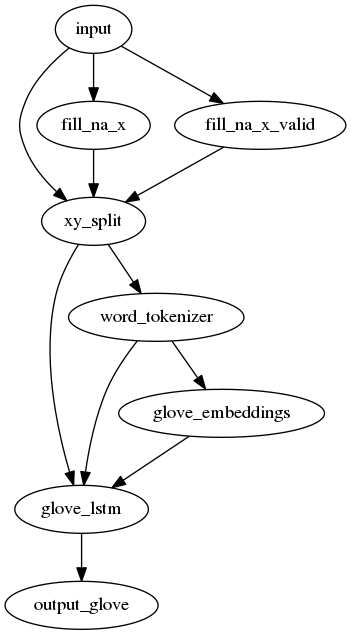

In [11]:
glove_lstm_pipeline = pipelines.glove_lstm_train(SOLUTION_CONFIG)
glove_lstm_pipeline

# Glove SCNN

## Score **0.0551**

## Training curve

<img src="imgs/glove_scnn.png" alt="Drawing" style="width: 600px;">


## Experiment with the following parameters 

`neptune_config.py`
```yaml
parameters:
  # Preprocessing
  max_features_word: 100000
  maxlen_words: 100

  # Glove Shallow CNN Architecture
  filter_nr: 256
  kernel_size: 6
  repeat_block: None
  dense_size: 256
  repeat_dense: 2
  trainable_embedding: 0
  word_embedding_size: 300
  char_embedding_size: None
  global_pooling: 1

  # General Architecture
  use_prelu: 1

  # Training schedule
  epochs_nr: 1000
  batch_size_train: 128
  batch_size_inference: 128
  lr: 0.01
  momentum: 0.9
  gamma: 0.97
  patience: 10

  # Regularization
  use_batch_norm: 1
  l2_reg_convo: 0.0001
  l2_reg_dense: 0.0
  dropout_lstm: 0.2
  dropout_convo: 0.2
  dropout_dense: 0.5

```

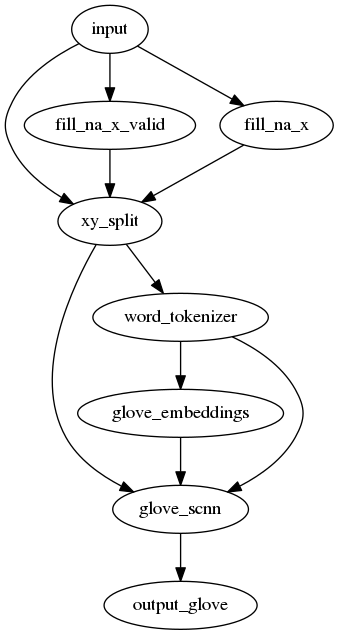

In [43]:
glove_scnn_pipeline = pipelines.glove_scnn_train(SOLUTION_CONFIG)
glove_scnn_pipeline

# Glove DPCNN

## Score **0.0567**

## Training curve

<img src="imgs/glove_dpcnn.png" alt="Drawing" style="width: 600px;">


## Experiment with the following parameters 

`neptune_config.py`
```yaml
parameters:
  # Preprocessing
  max_features_word: 100000
  maxlen_words: 100

  # Glove Deep Pyramid Architecture
  filter_nr: 64
  kernel_size: 3
  repeat_block: 2
  dense_size: 256
  repeat_dense: 2
  trainable_embedding: 0
  word_embedding_size: 300
  char_embedding_size: None
  global_pooling: 1

  # General Architecture
  use_prelu: 1

  # Training schedule
  epochs_nr: 1000
  batch_size_train: 128
  batch_size_inference: 128
  lr: 0.01
  momentum: 0.9
  gamma: 0.97
  patience: 10

  # Regularization
  use_batch_norm: 1
  l2_reg_convo: 0.0001
  l2_reg_dense: 0.0
  dropout_lstm: 0.2
  dropout_convo: 0.2
  dropout_dense: 0.5

```

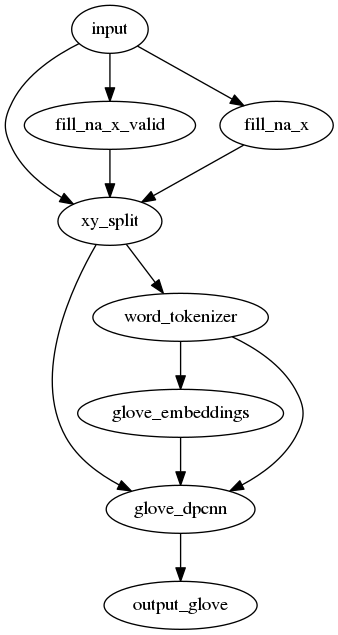

In [44]:
glove_dpcnn_pipeline = pipelines.glove_dpcnn_train(SOLUTION_CONFIG)
glove_dpcnn_pipeline

# Char VDCNN

## Score **0.0609**

## Training curve

<img src="imgs/char_vdcnn.png" alt="Drawing" style="width: 600px;">


## Experiment with the following parameters 

`neptune_config.py`
```yaml
parameters:
  # Preprocessing
  max_features_char: 100 
  maxlen_char: 512

  # Char VDCNN Architecture
  filter_nr: 32
  kernel_size: 3
  repeat_block: 2
  global_pooling: 1
  trainable_embedding: 1
  dense_size: 256
  repeat_dense: 2
  char_embedding_size: 32
  word_embedding_size: None

  # General Architecture
  use_prelu: 1

  # Training schedule
  epochs_nr: 1000
  batch_size_train: 128
  batch_size_inference: 128
  lr: 0.01
  momentum: 0.9
  gamma: 0.97
  patience: 10

  # Regularization
  use_batch_norm: 1
  l2_reg_convo: 0.0001
  l2_reg_dense: 0.0
  dropout_lstm: 0.2
  dropout_convo: 0.2
  dropout_dense: 0.5

```

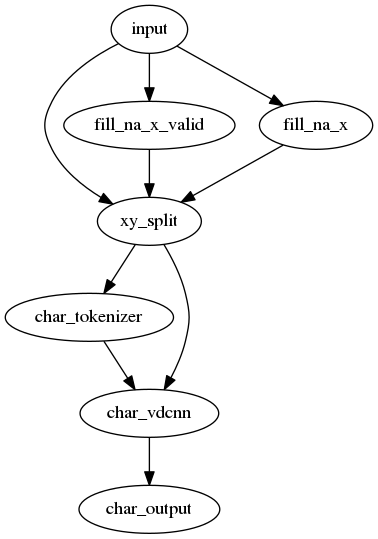

In [45]:
char_vdcnn_pipeline = pipelines.char_vdcnn_train(SOLUTION_CONFIG)
char_vdcnn_pipeline

# Char TFIDF + LogReg

## Score **0.0471**


## Experiment with the following parameters 

`neptune_config.py`
```yaml
parameters:
  # Preprocessing
  max_features_char: 100 #100 for vdcnn, for tfidf something like 20000 should be used
  max_features_word: 100000
  maxlen_char: 512
  maxlen_words: 100
  char_ngram_max: 4

    
  # Log Reg Params
  log_reg_c: 4.0

```

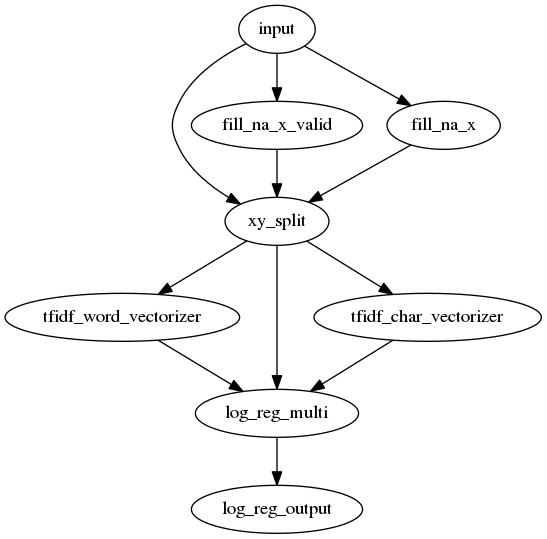

In [46]:
tfidf_logreg_pipeline = pipelines.tfidf_logreg_train(SOLUTION_CONFIG)
tfidf_logreg_pipeline

# Weighted Average Ensemble 

## Score **0.0443**

No custom weights specified

## Experiment with

```yaml
parameters:
    
  # Ensemble Log Reg
  weights: None # [w_tfidf_log_reg, w_char_vdcnn, w_word_lstm, w_glove_lstm, w_glove_scnn, w_glove_dpcnn]


```

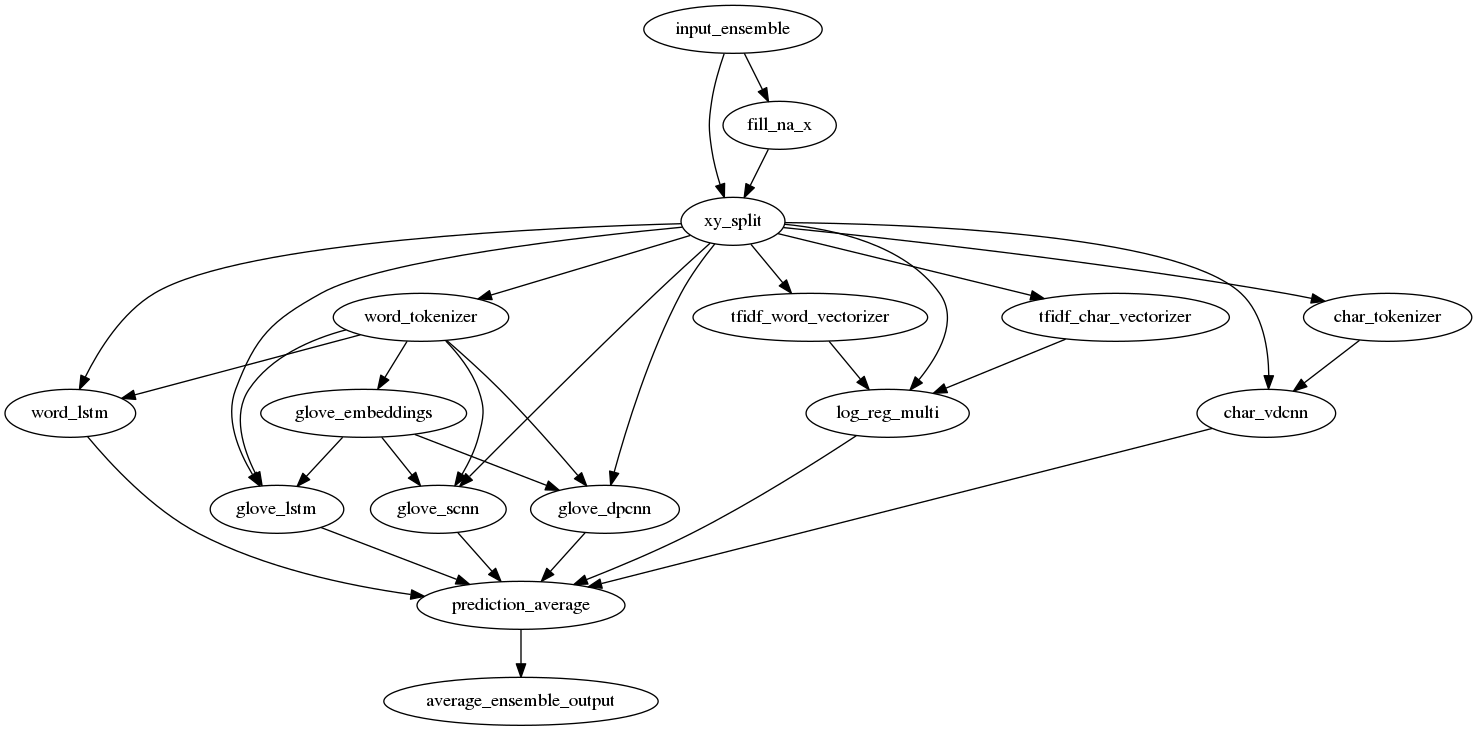

In [47]:
average_ensemble_pipeline = pipelines.weighted_average_ensemble_train(SOLUTION_CONFIG)
average_ensemble_pipeline

# Log Reg Ensemble 
## Score **0.0424**
## Experiment with

```yaml
parameters:
    
  # Ensemble Log Reg
  ensemble_log_reg_c: 1.0

```

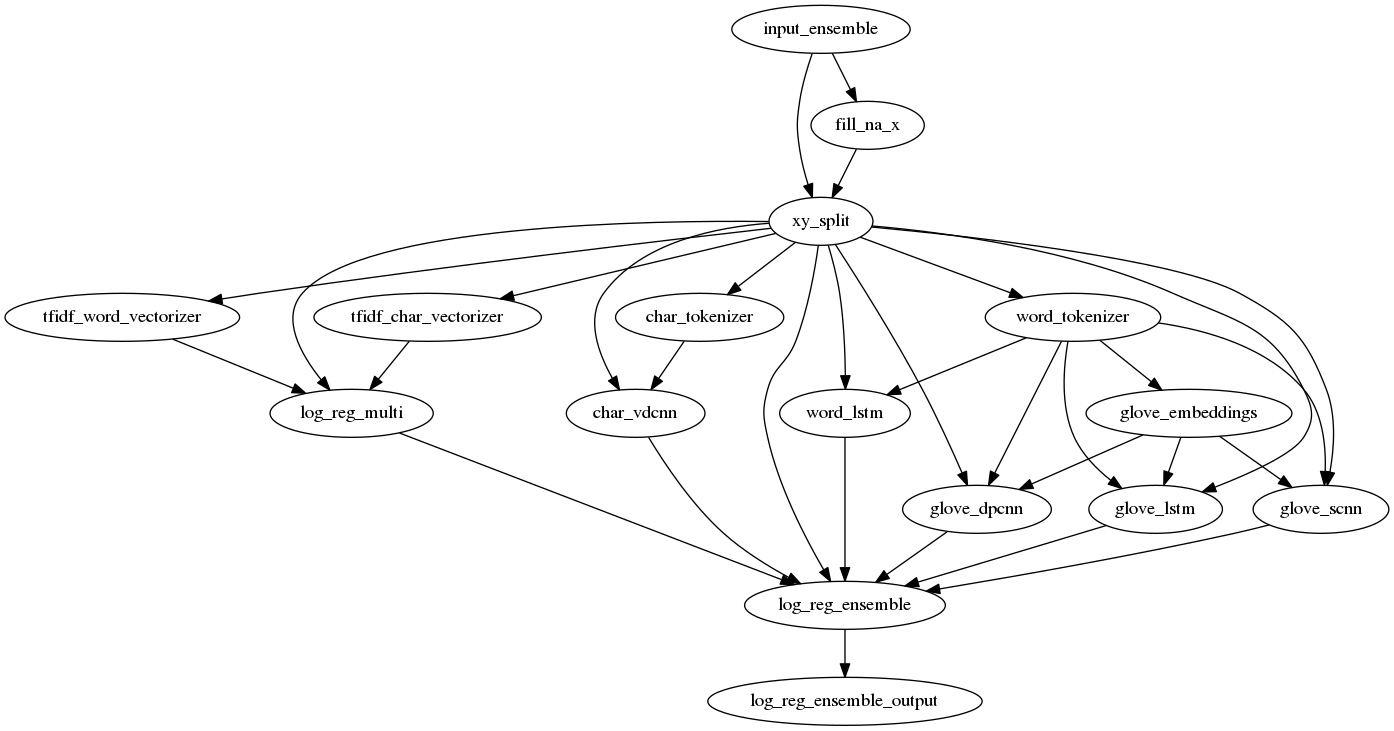

In [48]:
logreg_ensemble_pipeline = pipelines.logistic_regression_ensemble_train(SOLUTION_CONFIG)
logreg_ensemble_pipeline

# Figshare
## Attacks

In [12]:
comments = pd.read_csv('/mnt/ml-team/minerva/toxic/data/wikipedia_100k_attacks/attack_annotated_comments.tsv', sep = '\t', index_col = 0)
annotations = pd.read_csv('/mnt/ml-team/minerva/toxic/data/wikipedia_100k_attacks/attack_annotations.tsv',  sep = '\t')

In [17]:
comments.reset_index(inplace=True)

In [18]:
comments.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train
1,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train
3,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
4,93890,This page will need disambiguation.,2002,True,article,random,train


In [13]:
annotations.head()

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
0,37675,1362,0.0,0.0,0.0,0.0,0.0
1,37675,2408,0.0,0.0,0.0,0.0,0.0
2,37675,1493,0.0,0.0,0.0,0.0,0.0
3,37675,1439,0.0,0.0,0.0,0.0,0.0
4,37675,170,0.0,0.0,0.0,0.0,0.0


In [19]:
mean_annotations = annotations.groupby('rev_id').mean().reset_index()[['rev_id','attack']]
mean_annotations.head()

,rev_id,attack
0,37675,0.000000
1,44816,0.000000
2,49851,0.000000
3,89320,0.444444
4,93890,0.000000


In [22]:
attack_df = pd.merge(comments, mean_annotations, on='rev_id')
attack_df.head()

,rev_id,comment,year,logged_in,ns,sample,split,attack
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,0.000000
1,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train,0.000000
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train,0.000000
3,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev,0.444444
4,93890,This page will need disambiguation.,2002,True,article,random,train,0.000000


In [23]:
attack_df.to_csv('/mnt/ml-team/minerva/toxic/data/wikipedia_100k_attacks/figshare_attacks.csv',index=None)

## Toxicity

In [28]:
comments = pd.read_csv('/mnt/ml-team/minerva/toxic/data/wikipedia_160k_toxicity/toxicity_annotated_comments.tsv', sep = '\t', index_col = 0)
annotations = pd.read_csv('/mnt/ml-team/minerva/toxic/data/wikipedia_160k_toxicity/toxicity_annotations.tsv',  sep = '\t')

In [29]:
comments.reset_index(inplace=True)

In [30]:
annotations.head()

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0


In [31]:
mean_annotations = annotations.groupby('rev_id').mean().reset_index()[['rev_id','toxicity','toxicity_score']]
mean_annotations.head()

,rev_id,toxicity,toxicity_score
0,2232.0,0.1,0.4
1,4216.0,0.0,0.5
2,8953.0,0.0,0.1
3,26547.0,0.0,0.6
4,28959.0,0.2,0.2


In [32]:
toxicity_df = pd.merge(comments, mean_annotations, on='rev_id')
toxicity_df.head()

,rev_id,comment,year,logged_in,ns,sample,split,toxicity,toxicity_score
0,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,0.1,0.4
1,4216.0,`NEWLINE_TOKENNEWLINE_TOKEN:Clarification for ...,2002,True,user,random,train,0.0,0.5
2,8953.0,Elected or Electoral? JHK,2002,False,article,random,test,0.0,0.1
3,26547.0,`This is such a fun entry. DevotchkaNEWLINE_...,2002,True,article,random,train,0.0,0.6
4,28959.0,Please relate the ozone hole to increases in c...,2002,True,article,random,test,0.2,0.2


In [33]:
toxicity_df.to_csv('/mnt/ml-team/minerva/toxic/data/wikipedia_160k_toxicity/figshare_toxicity.csv',index=None)

In [34]:
toxicity_df.split.unique()

array(['train', 'test', 'dev'], dtype=object)

# Bad words

In [52]:
compiled_bad_words = set()

In [63]:
with open('/mnt/ml-team/minerva/toxic/data/bad_words/Terms-to-Block.csv') as f:
    bad = f.read()
bad = bad.split('\n')

def clean_string(s):
    s = s.replace(',"','')
    s = s.replace('",','')
    s = s.replace(',','')
    return s
bad = [clean_string(s) for s in bad[4:]][:-1]
compiled_bad_words.update(bad)

In [64]:
with open('/mnt/ml-team/minerva/toxic/data/bad_words/badwords.txt') as f:
    bad = f.read()
bad = bad.split('\n')

def get_first(s):
    s = s.split(', ')
    return s[0]
bad = [get_first(s) for s in bad]
compiled_bad_words.update(bad)

In [68]:
with open('/mnt/ml-team/minerva/toxic/data/bad_words/kaggle_bad_words.txt') as f:
    bad = f.read()
bad = bad.split('\n')

def get_first(s):
    s = s.split(', ')
    return s[0]
bad = [get_first(s) for s in bad]
compiled_bad_words.update(bad)

In [72]:
with open('/mnt/ml-team/minerva/toxic/data/bad_words/swearWords.csv') as f:
    bad = f.read()
bad = bad.split('\n')
bad = bad[0].split(',')
compiled_bad_words.update(bad)

In [77]:
import codecs
with codecs.open('/mnt/ml-team/minerva/toxic/data/bad_words/full_bad_words_google.txt', 
                 "r",encoding='utf-8', errors='ignore') as f:
    bad = f.read()
bad = bad.split('\n')
def clean(s):
    s = s.replace('\r','')
    return s
bad = [clean(s) for s in bad]
compiled_bad_words.update(bad)

In [79]:
from sklearn.externals import joblib
joblib.dump(compiled_bad_words, '/mnt/ml-team/minerva/toxic/data/bad_words/compiled_bad_words_set.pkl')

['/mnt/ml-team/minerva/toxic/data/bad_words/compiled_bad_words_set.pkl']

In [ ]:
import pandas as pd
import string

class TextCounter():
    def __init__(self):
        pass
    
    def transform(self, X):
        X = pd.DataFrame(X, columns=['text']).astype(str)
        X = X['text'].apply(self._transform)
        return {'X': X}
    
    def _transform(self, x):
        features = {}
        features['char_count'] = char_count(x)
        features['word_count'] = word_count(x)
        features['punctuation_count'] = punctuation_count(x)
        features['upper_case_count'] = upper_case_count(x)
        features['lower_case_count'] = lower_case_count(x)
        features['digit_count'] = digit_count(x)
        features['space_count'] = space_count(x)
        return pd.Series(features)
    
def punctuation_count(x):
    return 

def char_count(x):
    return len(x)

def word_count(x):
    return len(x.split())

def upper_case_count(x):
    return sum(c.isupper() for c in x)

def lower_case_count(x):
    return sum(c.islower() for c in x)

def digit_count(x):
    return sum(c.isdigit() for c in x)

def space_count(x):
    return sum(c.isspace() for c in x)

def punctuation_count(x):
    return  occurence(x, string.punctuation)

def occurence(s1, s2):
    return sum([1 for x in s1 if x in s2])

In [ ]:
text_counter = TextCounter()
out = text_counter.transform(train['comment_text'].values)

In [ ]:
out['X']

In [81]:
def bad_words_count(x):
    return 

In [7]:
pipe = pipelines.tfidf_logreg_inference(SOLUTION_CONFIG)

In [ ]:
pipe_in = {'input': {'meta': train,
                  'meta_valid': None,
                  'train_mode': True,
                  },
        }
out = pipe.transform(pipe_in)

INFO:toxic:step xy_train adapting inputs
INFO:toxic:step xy_train loading transformer...
INFO:toxic:step xy_train transforming...
INFO:toxic:step xy_train adapting inputs
INFO:toxic:step xy_train loading transformer...
INFO:toxic:step xy_train transforming...
INFO:toxic:step text_cleaner_train adapting inputs
INFO:toxic:step text_cleaner_train loading transformer...
INFO:toxic:step text_cleaner_train transforming...
INFO:toxic:step cleaning_output adapting inputs
INFO:toxic:step cleaning_output loading transformer...
INFO:toxic:step cleaning_output transforming...
INFO:toxic:step xy_train adapting inputs
INFO:toxic:step xy_train loading transformer...
INFO:toxic:step xy_train transforming...
INFO:toxic:step xy_train adapting inputs
INFO:toxic:step xy_train loading transformer...
INFO:toxic:step xy_train transforming...
INFO:toxic:step text_cleaner_train adapting inputs
INFO:toxic:step text_cleaner_train loading transformer...
INFO:toxic:step text_cleaner_train transforming...
INFO:toxi

In [ ]:
out.keys()